## 完整591網路爬蟲

In [12]:
import requests
from bs4 import BeautifulSoup
rs  = requests.session()
res = rs.get('https://rent.591.com.tw/?kind=1&region=1&section=5')
soup = BeautifulSoup(res.text)
token = soup.select_one('meta[name="csrf-token"]')['content']

In [11]:
int(793 / 30) + 1

27

In [17]:
import pandas
headers = {
'X-CSRF-TOKEN': token,
'X-Requested-With': 'XMLHttpRequest'    
}
apiurl = 'https://rent.591.com.tw/home/search/rsList?is_new_list=1&type=1&kind=1&searchtype=1&region=1&section=5&firstRow={}&totalRows=793'

pagenum = int(793 / 30) + 1
dataary = []
for p in range(pagenum):
    res2 = rs.get(apiurl.format(p*30), headers = headers)
    df = pandas.DataFrame(res2.json()['data']['data'])
    dataary.append(df)

In [18]:
len(dataary)

27

In [16]:
#dataary[0]

In [21]:
import pandas
df = pandas.concat(dataary)
df.head()

,addInfo,addition2,addition3,addition4,addr_number_name,address,address_img,address_img_title,alley_name,allfloor,...,storeprice,street_name,streetid,type,unit,updatetime,user_id,vipBorder,vipimg,vipstyle
0,,0,0,1,,敦化南路敦南燙金門牌挑高..,敦南燙金門牌挑高六米面101適合公司總部,敦南燙金門牌挑高六米面101適合公司總部,,21,...,0,敦化南路,42066,1,元/月,1556880242,855992,vipStyle,,isvip
1,,0,0,1,86號,光復南路高樓層大巨蛋正對..,高樓層大巨蛋正對面近捷運國父紀念館站,高樓層大巨蛋正對面近捷運國父紀念館站,,13,...,0,光復南路,25623,1,元/月,1558932105,452502,vipStyle,,isvip
2,,0,0,1,162號,延吉街仁愛高檔裝潢華廈--..,仁愛高檔裝潢華廈--福斯地產,仁愛高檔裝潢華廈--福斯地產,,7,...,0,延吉街,25635,1,元/月,1558511136,21570,vipStyle,,isvip
3,,0,0,1,,信義路三段台北大安森林公..,台北大安森林公園(可短租/設籍/營登),台北大安森林公園(可短租/設籍/營登),,14,...,0,信義路三段,25647,1,元/月,1556941550,104199,vipStyle,,isvip
4,,0,0,1,,復興南路一段*可短租*大..,*可短租*大安捷運站優質3房2廳2衛豪宅,*可短租*大安捷運站優質3房2廳2衛豪宅,,14,...,0,復興南路一段,25660,1,元/月,1557211416,1372887,vipStyle,,isvip


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 790 entries, 0 to 9
Data columns (total 88 columns):
addInfo                   790 non-null object
addition2                 790 non-null int64
addition3                 790 non-null int64
addition4                 790 non-null int64
addr_number_name          790 non-null object
address                   790 non-null object
address_img               790 non-null object
address_img_title         790 non-null object
alley_name                790 non-null object
allfloor                  790 non-null int64
area                      790 non-null float64
balcony_area              0 non-null object
browsenum                 790 non-null int64
browsenum_all             790 non-null int64
browsenum_name            790 non-null object
cartplace                 790 non-null object
cases_id                  790 non-null object
cases_name                790 non-null object
checkstatus               790 non-null int64
closed                    790 n

In [23]:
df = df[['address', 'floor', 'allfloor', 'layout', 'area', 'price', 'browsenum_all']]

In [24]:
df.head()

,address,floor,allfloor,layout,area,price,browsenum_all
0,敦化南路敦南燙金門牌挑高..,21,21,6房4廳5衛,140.0,"260,000",1448
1,光復南路高樓層大巨蛋正對..,10,13,4房2廳2衛,71.3,"130,000",1615
2,延吉街仁愛高檔裝潢華廈--..,6,7,4房2廳2衛,38.0,"65,000",1392
3,信義路三段台北大安森林公..,12,14,1房2廳1衛,11.0,"36,000",1977
4,復興南路一段*可短租*大..,13,14,3房2廳2衛,43.0,"105,000",817


In [27]:
df['price'] = df['price'].map(lambda e: int(e.replace(',', '')))

In [28]:
df.head()

,address,floor,allfloor,layout,area,price,browsenum_all
0,敦化南路敦南燙金門牌挑高..,21,21,6房4廳5衛,140.0,260000,1448
1,光復南路高樓層大巨蛋正對..,10,13,4房2廳2衛,71.3,130000,1615
2,延吉街仁愛高檔裝潢華廈--..,6,7,4房2廳2衛,38.0,65000,1392
3,信義路三段台北大安森林公..,12,14,1房2廳1衛,11.0,36000,1977
4,復興南路一段*可短租*大..,13,14,3房2廳2衛,43.0,105000,817


In [30]:
df[['layout_bedroom','layout_livingroom','layout_bathroom']] = df['layout'].str.extract('(\d+)房(\d+)廳(\d+)衛')

In [31]:
df.head()

,address,floor,allfloor,layout,area,price,browsenum_all,layout_bedroom,layout_livingroom,layout_bathroom
0,敦化南路敦南燙金門牌挑高..,21,21,6房4廳5衛,140.0,260000,1448,6,4,5
1,光復南路高樓層大巨蛋正對..,10,13,4房2廳2衛,71.3,130000,1615,4,2,2
2,延吉街仁愛高檔裝潢華廈--..,6,7,4房2廳2衛,38.0,65000,1392,4,2,2
3,信義路三段台北大安森林公..,12,14,1房2廳1衛,11.0,36000,1977,1,2,1
4,復興南路一段*可短租*大..,13,14,3房2廳2衛,43.0,105000,817,3,2,2


In [33]:
df.isna().sum()

address              0
floor                0
allfloor             0
layout               0
area                 0
price                0
browsenum_all        0
layout_bedroom       2
layout_livingroom    2
layout_bathroom      2
dtype: int64

In [34]:
df.dropna(inplace=True)

In [35]:
df.isna().sum()

address              0
floor                0
allfloor             0
layout               0
area                 0
price                0
browsenum_all        0
layout_bedroom       0
layout_livingroom    0
layout_bathroom      0
dtype: int64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 788 entries, 0 to 9
Data columns (total 10 columns):
address              788 non-null object
floor                788 non-null int64
allfloor             788 non-null int64
layout               788 non-null object
area                 788 non-null float64
price                788 non-null int64
browsenum_all        788 non-null int64
layout_bedroom       788 non-null object
layout_livingroom    788 non-null object
layout_bathroom      788 non-null object
dtypes: float64(1), int64(4), object(5)
memory usage: 67.7+ KB


In [38]:
df['layout_bedroom'] = df['layout_bedroom'].astype(int)
df['layout_livingroom'] = df['layout_livingroom'].astype(int)
df['layout_bathroom'] = df['layout_bathroom'].astype(int)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 788 entries, 0 to 9
Data columns (total 10 columns):
address              788 non-null object
floor                788 non-null int64
allfloor             788 non-null int64
layout               788 non-null object
area                 788 non-null float64
price                788 non-null int64
browsenum_all        788 non-null int64
layout_bedroom       788 non-null int32
layout_livingroom    788 non-null int32
layout_bathroom      788 non-null int32
dtypes: float64(1), int32(3), int64(4), object(2)
memory usage: 58.5+ KB


In [40]:
df.head()

,address,floor,allfloor,layout,area,price,browsenum_all,layout_bedroom,layout_livingroom,layout_bathroom
0,敦化南路敦南燙金門牌挑高..,21,21,6房4廳5衛,140.0,260000,1448,6,4,5
1,光復南路高樓層大巨蛋正對..,10,13,4房2廳2衛,71.3,130000,1615,4,2,2
2,延吉街仁愛高檔裝潢華廈--..,6,7,4房2廳2衛,38.0,65000,1392,4,2,2
3,信義路三段台北大安森林公..,12,14,1房2廳1衛,11.0,36000,1977,1,2,1
4,復興南路一段*可短租*大..,13,14,3房2廳2衛,43.0,105000,817,3,2,2


In [41]:
del df['layout']
df.head()

,address,floor,allfloor,area,price,browsenum_all,layout_bedroom,layout_livingroom,layout_bathroom
0,敦化南路敦南燙金門牌挑高..,21,21,140.0,260000,1448,6,4,5
1,光復南路高樓層大巨蛋正對..,10,13,71.3,130000,1615,4,2,2
2,延吉街仁愛高檔裝潢華廈--..,6,7,38.0,65000,1392,4,2,2
3,信義路三段台北大安森林公..,12,14,11.0,36000,1977,1,2,1
4,復興南路一段*可短租*大..,13,14,43.0,105000,817,3,2,2


In [42]:
import sqlite3
with sqlite3.connect('house.sqlite') as db:
    df.to_sql('renthouse', con = db, if_exists='replace')

## 資料分析

In [43]:
df.min()

address              仁愛路三段118巷精美靜巷純住..
floor                                1
allfloor                             2
area                               7.8
price                            10000
browsenum_all                        0
layout_bedroom                       1
layout_livingroom                    0
layout_bathroom                      1
dtype: object

In [44]:
df['price'].min()

10000

In [45]:
df['price'].max()

350000

In [46]:
df['price'].count()

788

In [47]:
df.head()

,address,floor,allfloor,area,price,browsenum_all,layout_bedroom,layout_livingroom,layout_bathroom
0,敦化南路敦南燙金門牌挑高..,21,21,140.0,260000,1448,6,4,5
1,光復南路高樓層大巨蛋正對..,10,13,71.3,130000,1615,4,2,2
2,延吉街仁愛高檔裝潢華廈--..,6,7,38.0,65000,1392,4,2,2
3,信義路三段台北大安森林公..,12,14,11.0,36000,1977,1,2,1
4,復興南路一段*可短租*大..,13,14,43.0,105000,817,3,2,2


In [48]:
df.tail()

,address,floor,allfloor,area,price,browsenum_all,layout_bedroom,layout_livingroom,layout_bathroom
5,復興南路一段忠孝復興美宅/日..,10,10,17.0,33000,225,1,1,1
6,"樂利路42巷近遠企商圈,溫馨1..",3,7,22.0,24000,1331,1,1,1
7,信義路二段信義路二段溫馨小豪..,11,11,17.1,68000,144,3,2,2
8,光復南路English/昇陽GRAND套..,14,14,21.7,47000,202,1,1,1
9,永康街師大商圈一樓小豪宅,1,13,38.0,50000,912,2,2,1


In [49]:
df.describe()

,floor,allfloor,area,price,browsenum_all,layout_bedroom,layout_livingroom,layout_bathroom
count,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000
mean,7.925127,12.098985,41.980203,70715.385787,270.780457,2.744924,1.810914,1.805838
std,9.368944,5.545959,23.323394,48203.251623,747.852810,1.024310,0.497549,0.729914
min,1.000000,2.000000,7.800000,10000.000000,0.000000,1.000000,0.000000,1.000000
25%,4.000000,7.000000,26.000000,44999.750000,56.000000,2.000000,2.000000,1.000000
50%,6.000000,12.000000,38.100000,59999.000000,108.000000,3.000000,2.000000,2.000000
75%,10.000000,14.000000,53.000000,76000.000000,209.250000,3.000000,2.000000,2.000000
max,100.000000,28.000000,210.700000,350000.000000,10217.000000,6.000000,4.000000,5.000000


In [51]:
df.sort_values('price', ascending=False).head()

,address,floor,allfloor,area,price,browsenum_all,layout_bedroom,layout_livingroom,layout_bathroom
8,仁愛路三段成交多戶帝寶找我看..,8,18,210.7,350000,195,5,2,4
10,仁愛路三段★仁愛樹海★極致奢..,28,28,140.5,320000,258,4,3,4
12,仁愛路三段🏆仁愛帝寶.尊爵帝..,28,28,140.0,320000,170,4,3,4
9,仁愛路三段仁愛帝寶居高臨下王..,28,28,140.5,320000,148,5,3,4
24,仁愛路三段仁愛林蔭大道帝寶頂..,28,28,140.5,320000,12,4,3,4


In [52]:
df.mean()

floor                    7.925127
allfloor                12.098985
area                    41.980203
price                70715.385787
browsenum_all          270.780457
layout_bedroom           2.744924
layout_livingroom        1.810914
layout_bathroom          1.805838
dtype: float64

In [53]:
df['price'].mean()

70715.38578680203

In [54]:
df['price'].median()

59999.0

Populating the interactive namespace from numpy and matplotlib


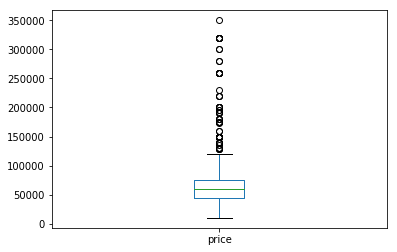

In [56]:
%pylab inline
df['price'].plot(kind = 'box')

Populating the interactive namespace from numpy and matplotlib


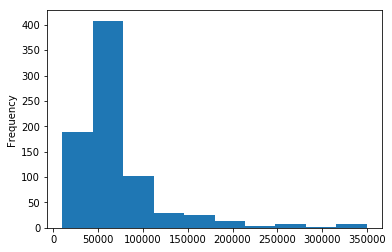

In [57]:
%pylab inline
df['price'].plot(kind = 'hist')

Populating the interactive namespace from numpy and matplotlib


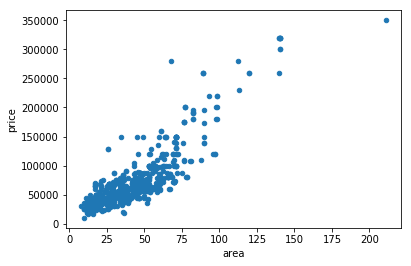

In [58]:
%pylab inline
df.plot(x = 'area', y= 'price', kind = 'scatter')

## 機器學習

In [59]:
from sklearn.linear_model import LinearRegression
X = df[['area']]
y = df['price']
regr = LinearRegression()
regr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [60]:
regr.coef_

array([1771.2032467])

In [61]:
regr.intercept_

-3640.0861448847427

Text(0, 0.5, 'price')

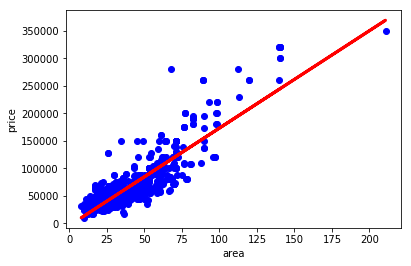

In [65]:
from matplotlib import pyplot as plt
plt.scatter(X,y, color= 'blue')
plt.plot(X, regr.predict(X), linewidth = 3, color = 'red')
plt.xlabel('area')
plt.ylabel('price')

In [69]:
import numpy as np
a = np.array([[20],[30]])
regr.predict(a)

array([31783.97878914, 49496.01125615])

In [77]:
df.columns

Index(['address', 'floor', 'allfloor', 'area', 'price', 'browsenum_all',
       'layout_bedroom', 'layout_livingroom', 'layout_bathroom'],
      dtype='object')

In [78]:
from sklearn.linear_model import LinearRegression
X = df[['floor', 'allfloor', 'area', 
       'layout_bedroom', 'layout_livingroom', 'layout_bathroom']]
y = df['price']
regr = LinearRegression()
regr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [79]:
predicted = regr.predict(X)

In [80]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y, predicted)

568080810.7976979

In [81]:
import statsmodels.api as sm
X = df[['floor', 'allfloor', 'area', 
       'layout_bedroom', 'layout_livingroom', 'layout_bathroom']]
y = df['price']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()

C:\Users\davidchiu\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [82]:
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     401.6
Date:                Mon, 27 May 2019   Prob (F-statistic):          9.38e-235
Time:                        14:23:27   Log-Likelihood:                -9060.3
No. Observations:                 788   AIC:                         1.813e+04
Df Residuals:                     781   BIC:                         1.817e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -6262.6824   3645.024     -1.718      0.086   -1.34e+04     892.522
floor               348.6219     94.210      3.700      0.000     163.686     533.557
allfloor           -107.5741    180.026     -0.598      0.550    -460.967     245.819
area               1643.5731     63.655     25.820      0.000    1518.618    1768.529
layout_bedroom    -5889.8842   1305.368     -4.512      0.000   -8452.330   -3327.439
layout_livingroom  -137.9992   2348.604     -0.059      0.953   -4748.323    4472.324
layout_bathroom     1.27e+04   2068.521      6.140      0.000    8640.726    1.68e+04
==============================================================================
Omnibus:                      167.737   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              581.042
Skew:                           0.989   Prob(JB):                    6.74e-127
Kurtosis:                       6.713   Cond. No.                         235.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""